<a href="https://colab.research.google.com/github/Ankuraxz/google-collab/blob/master/NN_basic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
#use keras for NN

In [4]:
Train,Test = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [5]:
XT,YT = Train
print(XT.shape,YT.shape)
Xt,Yt = Test
print(Xt.shape,Yt.shape)

(404, 13) (404,)
(102, 13) (102,)


In [0]:
mean = XT.mean(axis = 0)
std = XT.std(axis = 0)
XT = (XT-mean)/std
Xt = (Xt-mean)/std

In [0]:
#building a neural network
from keras.models import Sequential
from keras.layers import Dense

from keras import backend as K
def r2_score(y_true,y_pred):
  
  num = K.sum((y_true-y_pred))
  denom=K.sum(K.square(y_true-K.mean(y_true)))
  return(1-num/denom)
  
def Getmodel():
  model = Sequential() #activation fxn RELU
  model.add(Dense(64,activation='relu',input_shape=(13,))) #1st hidden layer
  model.add(Dense(32,activation='relu')) #2nd hidden layer
  model.add(Dense(1))
  
  model.compile(optimizer='adam',loss='mse',metrics=[r2_score])
  return model
  


In [0]:
model = Getmodel()

In [23]:
model.summary()
#hist = model.fit(XT,YT,epochs = 100, validation_data=(XT,YT,verbose=1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist = model.fit(XT,YT,epochs = 100, validation_data=(XT,YT),verbose=1)

W0708 09:42:34.875855 140551440910208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0708 09:42:34.966138 140551440910208 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 404 samples, validate on 404 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 591.0850 - r2_score: 0.7147 - val_loss: 569.5854 - val_r2_score: 0.6707
Epoch 2/100
404/404 [==============================] - 0s 81us/step - loss: 552.4200 - r2_score: 0.7086 - val_loss: 530.5658 - val_r2_score: 0.6841
Epoch 3/100
404/404 [==============================] - 0s 68us/step - loss: 510.5284 - r2_score: 0.7342 - val_loss: 483.0091 - val_r2_score: 0.7009
Epoch 4/100
404/404 [==============================] - 0s 60us/step - loss: 457.0742 - r2_score: 0.7499 - val_loss: 423.4062 - val_r2_score: 0.7235
Epoch 5/100
404/404 [==============================] - 0s 68us/step - loss: 392.1999 - r2_score: 0.7719 - val_loss: 349.0894 - val_r2_score: 0.7541
Epoch 6/100
404/404 [==============================] - 0s 62us/step - loss: 313.3528 - r2_score: 0.7892 - val_loss: 267.2290 - val_r2_score: 0.7923
Epoch 7/100
404/404 [==============================] - 0s 71us/step

In [0]:
import matplotlib.pyplot as plt

In [0]:
val_loss = hist.history['val_loss']
train_loss =hist.history['loss']

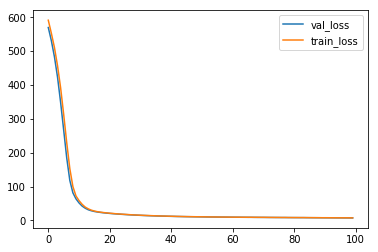

In [32]:
plt.plot(val_loss,label="val_loss")
plt.plot(train_loss,label="train_loss")
plt.legend()
plt.show()

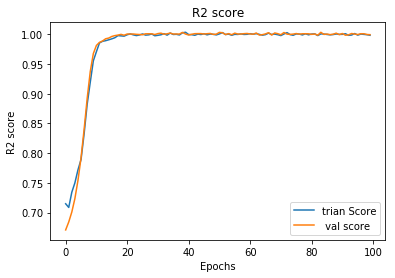

In [40]:
r2_score_train=hist.history['r2_score']
r2_score_val=hist.history['val_r2_score']

plt.plot(r2_score_train,label="trian Score")
plt.plot(r2_score_val,label=" val score")
plt.legend()
plt.title("R2 score")
plt.xlabel("Epochs")
plt.ylabel("R2 score")
plt.show()

In [41]:
model.evaluate(Xt,Yt)[1]

102/102 [==============================] - 0s 43us/step


37.36394818623861